<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화
> 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해해보기

#### 가중치 시각화

In [ ]:
# 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일 읽어들이기
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
# 모델에 추가한 층 확인
model.layers

In [ ]:
# 합성곱 층의 가중치 조사(가중치, 절편)
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
# 가중치 배열의 평균과 표준편차
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.025231464, 0.23826611)

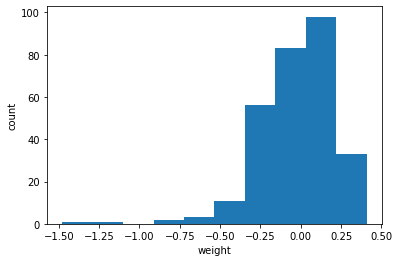

(288, 1)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
conv_weights.reshape(-1,1).shape

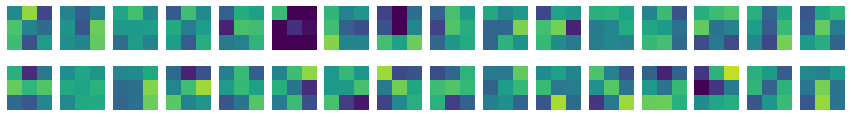

In [ ]:
# 커널을 16개씩 두줄에 출력
fig,axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax= 0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
# 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding = 'same', input_shape=(28, 28, 1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(-0.004883916, 0.08085965)

In [ ]:
no_training_weights.shape

(3, 3, 1, 32)

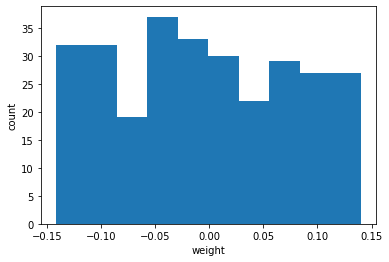

In [ ]:
# 가중치 배열을 히스토그램으로 표현
# 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문에 ~
# 대부분의 가중치가 -0.15 ~ 0.15 사이에 있고 비교적 고른 분포를 보임
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

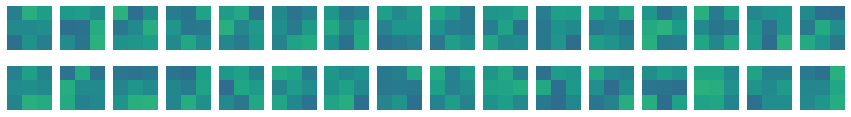

In [ ]:
# 가중치 값을 그림으로 출력
# 훈련 후의 그림과 비교하면 밋밋하다
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()
# 합성곱 신경망의 학습을 시각화하는 두 번째 방법
# 합성곱 층에서 출력된 특성 맵을 그려보는 것

#### 함수형 API
- Sequential 클래스는 층을 차례대로 쌓은 모델을 만들 때  사용
- 더 복잡한 모델에서는 함수형 API를 사용

      

- 함수처럼 호출해서 쓰기
> inputs 는 InputLayer 클래스의 출력값
      inputs = keras.Input(shape=(784,))
      dense1 = keras.layers.Dense(100, activation='sigmoid')
      dense2 = keras.layers.Dense(10, activation='softmax')
      # 입력값 inputs를 Dense 층에 통과시킨 후 출력값 hidden을 만들어 줌
      hidden = dense1(inputs)
      # 두번째 층 호출 : 첫번째 층의 출력을 입력으로 사용
      outputs = dense2(hidden)
      # inputs와 outputs을 Model 클래스로 연결
      model = keras.Model(inputs, outputs)

In [ ]:
# model 객체의 입력
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [ ]:
# conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환함
conv_acti = keras.Model(model.input, model.layers[0].output)

#### 특성 맵 시각화

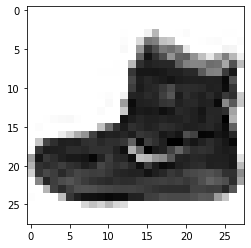

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
# Conv2D 층이 만드는 특성 맵 출력
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)

In [ ]:
feature_maps.shape

(1, 28, 28, 32)

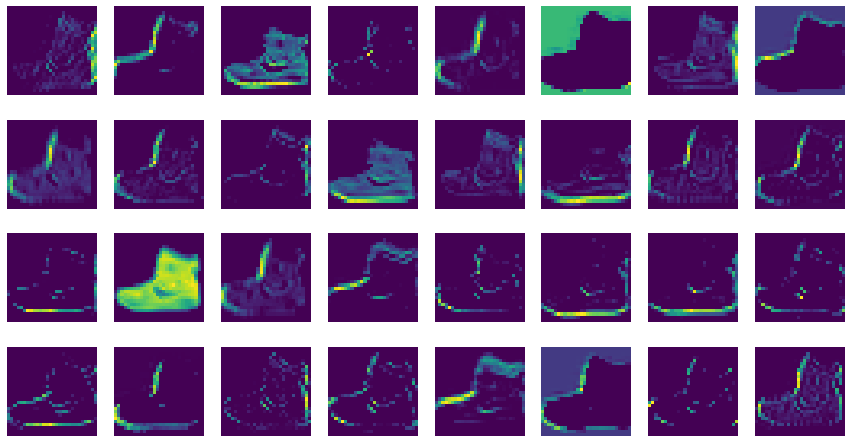

In [ ]:
# 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줌
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [ ]:
# 두번째 합성곱 층이 만든 특성 맵 확인
# model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 만들기
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
# conv2_acti 모델의 predict() 메서드에 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv2_acti.predict(inputs)

In [ ]:
feature_maps.shape

(1, 14, 14, 64)

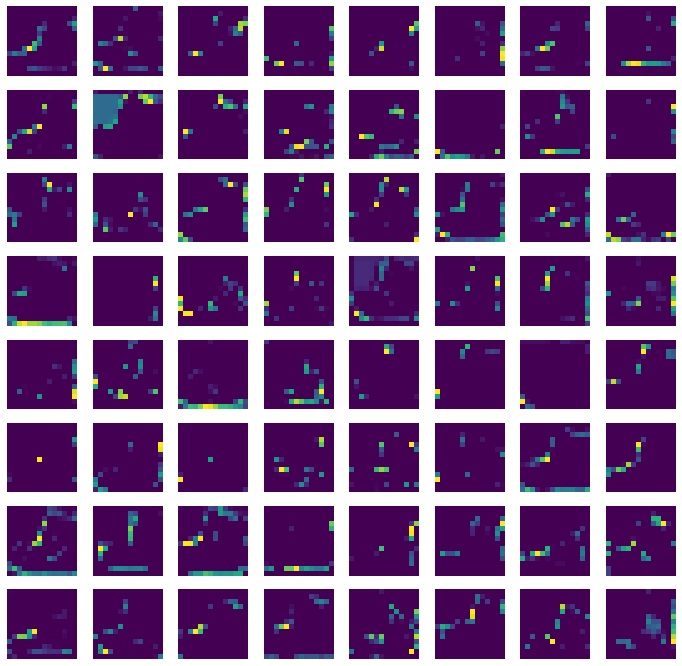

In [ ]:
# 64개의 특성 맵을 8개씩 나누어 imshow()함수로 그리기
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()
# 앞쪽의 합성곱 신경망은 이미지의 시각적인 정보를 감지
# 뒤쪽의 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습